# Introduction

The purpose of this project is to use Python visualization skills (ie matpolotlib) to answer questions from a dataset of the earnings of recent college graduates. The questions to be explored include:

- Do students in more popular majors make more money?
- What is the gender divide based on different majors?
- Which category of majors are most popular?

In [93]:
# load libraries and import dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [94]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [95]:
# Since we're focusing on data visualization, I'll just drop all nulls for now.

recent_grads = recent_grads.dropna()

# Scatter plots to explore relationships between fields

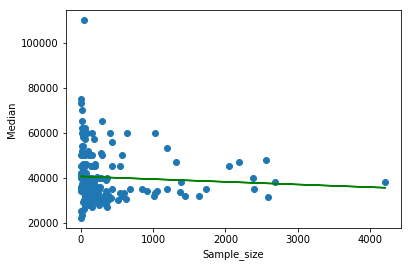

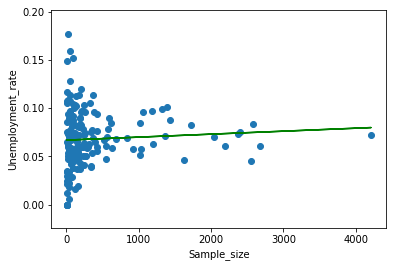

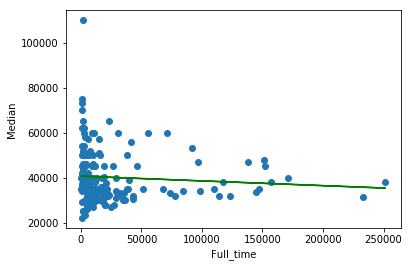

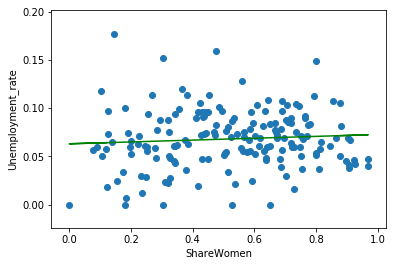

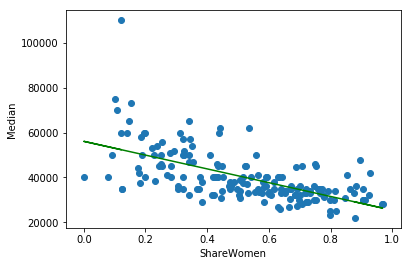

In [96]:
# some relationships to visualize

x = ['Sample_size', 'Sample_size', 'Full_time', 'ShareWomen', 'ShareWomen']
y = ['Median','Unemployment_rate','Median','Unemployment_rate','Median']

for i in range(len(x)):

    # do OLS regression first
    lr = LinearRegression()
    lr.fit(recent_grads[[x[i]]], recent_grads[y[i]])
    a0 = lr.intercept_
    a1 = lr.coef_

    plt.scatter(recent_grads[x[i]], recent_grads[y[i]])
    plt.ylabel(y[i])
    plt.xlabel(x[i])
    plt.plot(recent_grads[x[i]], recent_grads[x[i]]*a1 + a0, color='g')
    plt.show()


Q. Do students in more popular majors make more money?

A. No; from the first graph, we can see that there is a slight negative relationship between a major's popularity and the median income.

Q. Do students that majored in subjects that were majority female make more money?

A. No; there is a relatively strong negative relationship between the percentage of women enrolled in a major and the median income.

Q. Is there any link between the number of full-time employees and median salary?

A. Not really.

# Histograms

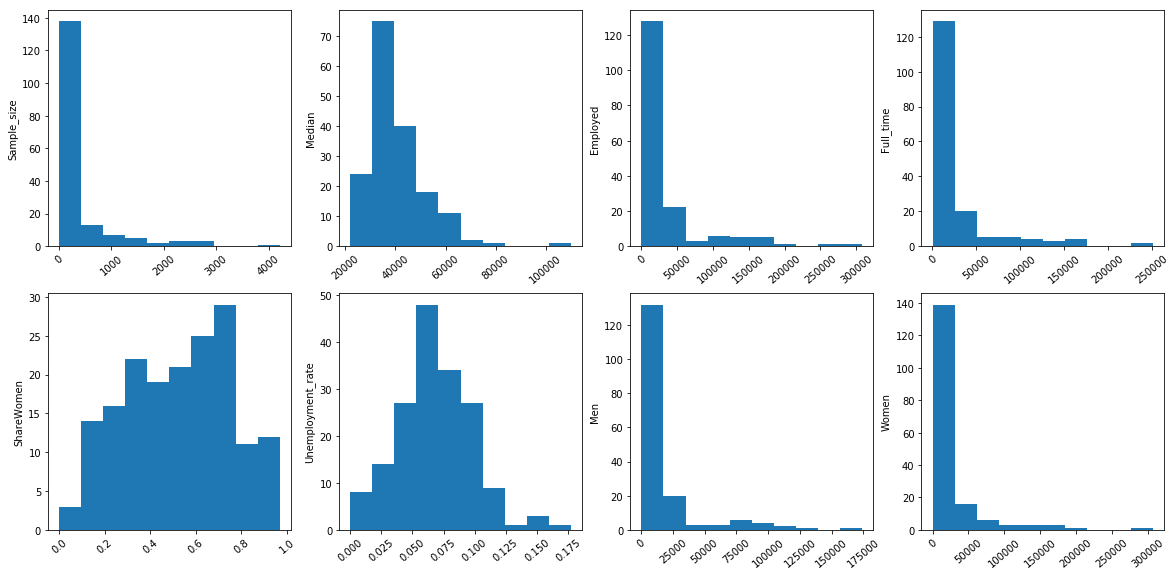

In [97]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,20))
for i in range(0,8):
    ax = fig.add_subplot(4,4,i+1)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=40)
    plt.ylabel(cols[i])

Q. What's the most common median salary range?

A. The majority of median salaries are in the range of \\$30,000 to \\$50,000.

# Scatter matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C8129F3C8>,
      dtype=object)

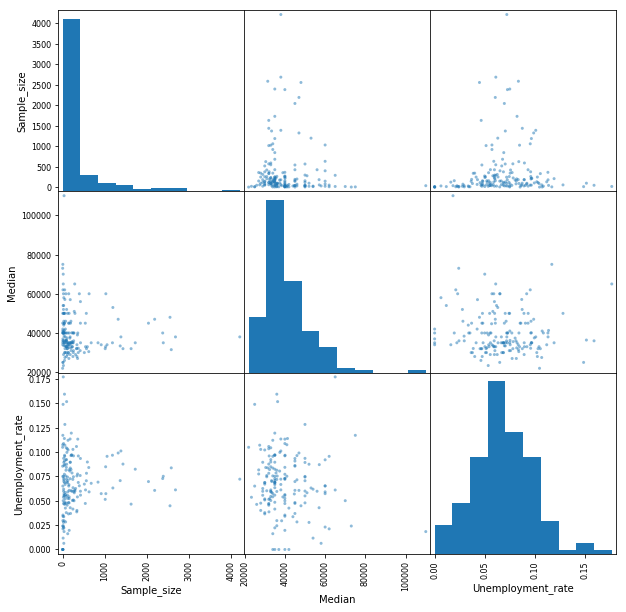

In [98]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Bar Plots

In [99]:
# We'll pick a small number of majors (roughly, "the Arts") in order to make the graphs less busy.

arts = ['Arts', 'Social Science', 'Education','Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism']

arts_grads = recent_grads[recent_grads['Major_category'].isin(arts)]

arts_grads['Major_category'].unique()

array(['Arts', 'Social Science', 'Education', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism'],
      dtype=object)

In [100]:
arts_grads_mean = arts_grads.groupby('Major_category', as_index=False).mean()

arts_grads_mean

,Major_category,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,Arts,131.125000,6015.125000,44641.250000,16798.750000,27842.500000,0.603658,407.500000,36014.250000,25971.625000,14348.875000,19138.875000,3528.500000,0.090173,33062.500000,21962.500000,43662.500000,11848.125000,20465.000000,7514.500000
1,Communications & Journalism,104.000000,1902.500000,98150.250000,32980.250000,65170.000000,0.658384,1127.000000,82665.000000,68332.500000,22454.250000,53557.000000,6713.000000,0.075538,34500.000000,26250.000000,44975.000000,21639.000000,43248.000000,12398.750000
2,Education,130.375000,2387.687500,34945.562500,6470.375000,28475.187500,0.748507,296.375000,29989.937500,24878.687500,7537.062500,18001.937500,1560.562500,0.051702,32350.000000,26590.625000,38562.500000,21169.562500,7610.062500,2554.375000
3,Humanities & Liberal Arts,135.066667,4048.600000,47564.533333,18189.733333,29374.800000,0.631790,356.000000,36274.533333,27795.933333,14268.666667,19704.066667,3406.733333,0.081008,31913.333333,23493.333333,42073.333333,12843.333333,18435.466667,6282.666667
4,Psychology & Social Work,143.000000,5258.111111,53445.222222,10901.666667,42543.555556,0.794397,353.333333,42260.444444,32111.111111,15332.444444,24233.888889,3699.111111,0.072065,30100.000000,25333.333333,38777.777778,18256.111111,18818.444444,6249.555556
5,Social Science,91.666667,5348.000000,58885.111111,28537.111111,30348.000000,0.553962,509.000000,44610.333333,38571.222222,13507.666667,28357.666667,4775.000000,0.095729,37344.444444,28355.555556,50111.111111,12662.222222,21138.444444,6020.000000


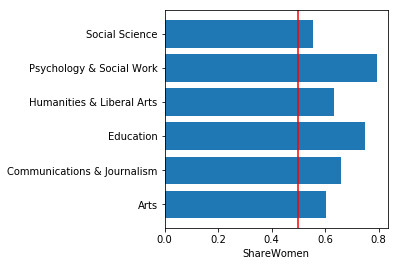

In [101]:
plt.figure(figsize=(4,4))
plt.barh(arts_grads_mean['Major_category'], arts_grads_mean['ShareWomen'])
plt.xlabel("ShareWomen")
plt.axvline(.5, color='r')

As can be seen from this bar graph, every major defined as being in the "arts" has a majority of female students. Of these majors, the highest proportion of female students are found in psychology and social work (around 80% of all students) and the lowest is in social science (around 55%).